In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sys

In [2]:
# add and set directory of the repository here
dire = '/home/mongardi/GIS_prior_knowledge'

In [3]:
sys.path.append(os.path.join(dire, "src"))
from run_experiments import * 
from utils.utils import *

In [4]:
sys.path.append(os.path.join(dire,"src/prior_knowledge"))
from create_kegg_pathways_matrix import KEGG_pathways_matrix

In [5]:
dire_CRC =  os.path.join(dire,'data/data_CRC')
dire_prior =  os.path.join(dire,'data/prior_knowledge')
dire_CRC_results = os.path.join(dire,'results/CRC')

In [6]:
# load dataset
df = pd.read_csv(os.path.join(dire_CRC, 'CRC_dataset.csv'), index_col='Unnamed: 0')
df.head()

X = df.drop(['class'], axis=1)
y = df['class']

In [7]:
# KEGG overlap
ids_file = os.path.join(dire,'data/prior_knowledge/genes_and_ids_all_red.csv')
kegg_filename = os.path.join(dire,'data/prior_knowledge/kegg_gene_pathways_names.csv')
kegg_pathways = os.path.join(dire,'data/prior_knowledge/kegg_hsa_pathways.txt')
get_kegg_pathways_matrix = KEGG_pathways_matrix(kegg_pathways, kegg_filename, ids_file, X.columns)
get_kegg_pathways_matrix.build_matrix()
get_kegg_pathways_matrix.get_symbol_matrix(get_kegg_pathways_matrix.pm)

100%|██████████| 17559/17559 [01:10<00:00, 249.79it/s]


In [8]:
matching_set_dir = os.path.join(dire_prior, 'CRC_pathway_gene_ids.txt')
matching_set_cancer_dir = os.path.join(dire_prior, 'cancer_pathway_gene_ids.txt')
matching_set = get_kegg_pathways_matrix.load_txt(matching_set_dir)
matching_set_cancer = get_kegg_pathways_matrix.load_txt(matching_set_cancer_dir)

In [9]:
results_dire_1 = os.path.join(dire_CRC_results, 'multi_lasso')
union_genes, intersection_genes = get_union_inter(results_dire_1, X, n_splits=10)
df_1= get_selected_genes(results_dire_1, intersection_genes, union_genes, 10, 5)  

371
369


In [10]:
matching_ids = get_kegg_pathways_matrix.get_matching_ids(intersection_genes, matching_set)
matching_ids_cancer =  get_kegg_pathways_matrix.get_matching_ids(intersection_genes, matching_set_cancer)

The total number of genes with KEGG annotations in the dataset: 369
Number of matches:  1
Percentages of matching genes:  0.0027100271002710027
The total number of genes with KEGG annotations in the dataset: 369
Number of matches:  28
Percentages of matching genes:  0.07588075880758807


In [11]:
results_dire_2= os.path.join(dire_CRC_results, 'multi_lasso_gis_go_reactome_hpo')
union_genes, intersection_genes = get_union_inter(results_dire_2, X, n_splits=10)
df_2= get_selected_genes(results_dire_2, intersection_genes, union_genes, 10, 5) 

420
420


In [12]:
matching_ids = get_kegg_pathways_matrix.get_matching_ids(intersection_genes, matching_set)
matching_ids_cancer =  get_kegg_pathways_matrix.get_matching_ids(intersection_genes, matching_set_cancer)

The total number of genes with KEGG annotations in the dataset: 420
Number of matches:  2
Percentages of matching genes:  0.004761904761904762
The total number of genes with KEGG annotations in the dataset: 420
Number of matches:  36
Percentages of matching genes:  0.08571428571428572


# Visualize Results

File 1
  Subtype      N      GO  GO sig   KEGG  KEGG sig  REACTOME  REACTOME sig  \
0  CRIS.A   67.0  2304.0    15.0  111.0       1.0     219.0           3.0   
1  CRIS.B   81.0  2067.0     2.0   69.0       0.0     266.0           1.0   
2  CRIS.C   74.0  2494.0     7.0  119.0       0.0     365.0           0.0   
3  CRIS.D   92.0  3029.0     0.0  128.0       0.0     302.0           0.0   
4  CRIS.E   86.0  2416.0     0.0   87.0       0.0     194.0           0.0   
5     all  369.0  5815.0     3.0  248.0       1.0     834.0           0.0   

      HPO  HPO sig  
0  1054.0      1.0  
1  1379.0      0.0  
2  1156.0      0.0  
3  1994.0      1.0  
4  1609.0      2.0  
5  3415.0      0.0  
File 2
  Subtype      N      GO  GO sig   KEGG  KEGG sig  REACTOME  REACTOME sig  \
0  CRIS.A   72.0  2520.0    41.0  136.0       3.0     253.0           3.0   
1  CRIS.B   94.0  2781.0     3.0  114.0       0.0     406.0           2.0   
2  CRIS.C   81.0  2789.0    37.0  134.0       1.0     409.0         

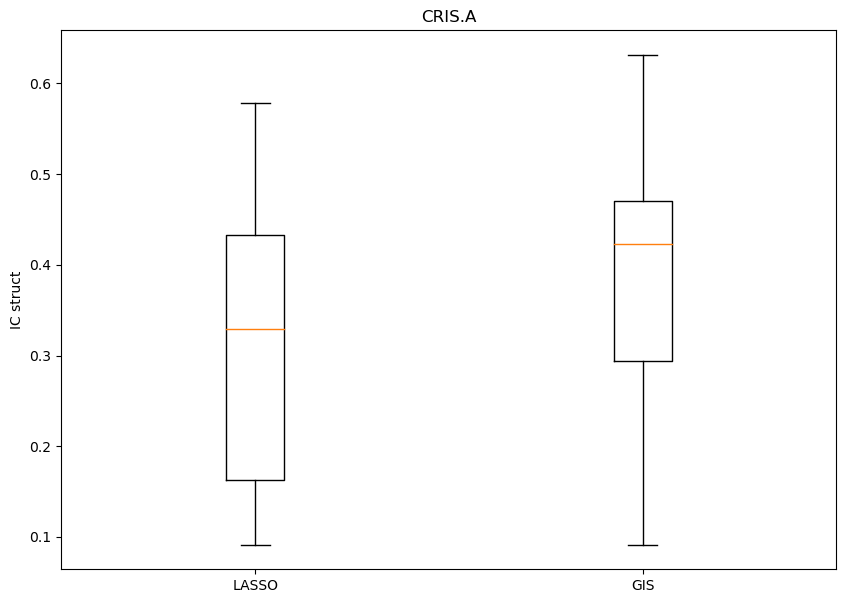


--------------------- CRIS.B ---------------------

T-test Proportions
----GO----
0.453
----KEGG----
nan
----Reactome----
0.412
----HPO----
0.141
----GO----
1.345
----KEGG----
1.652
----Reactome----
1.526
----HPO----
1.729
--------Statistics--------
File 1
Min: 0.4757375059873951 Max: 0.6153846153846154 Mean: 0.5455610606860053 std: 0.009750657581499608
File 2
Min: 0.0661214063760881 Max: 0.6153846153846154 Mean: 0.25805963278360144 std: 0.09593710253574261


/home/mongardi/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


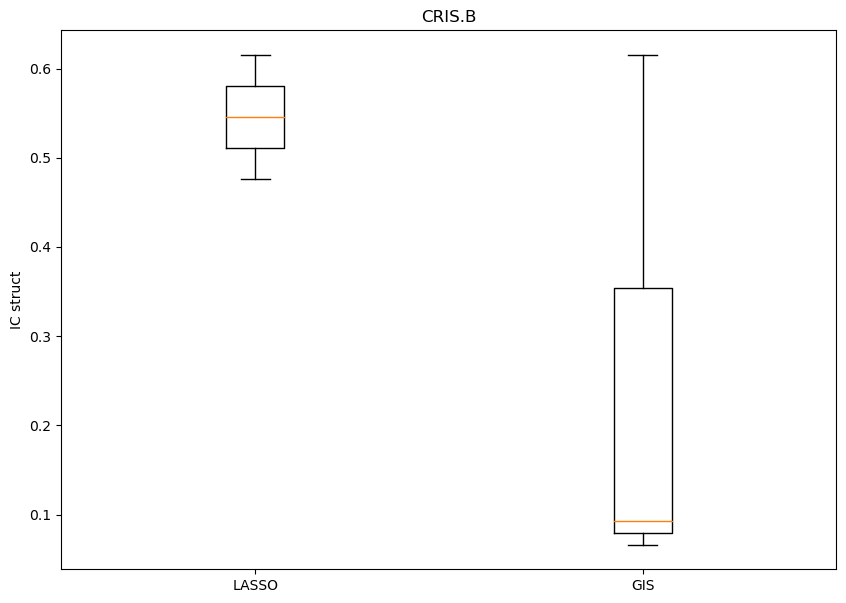


--------------------- CRIS.C ---------------------

T-test Proportions
----GO----
0.000
----KEGG----
0.173
----Reactome----
0.029
----HPO----
nan
----GO----
1.118
----KEGG----
1.126
----Reactome----
1.121
----HPO----
1.375
--------Statistics--------
File 1
Min: 0.1650284653075867 Max: 0.4232914781592526 Mean: 0.29064959696698656 std: 0.007003616974517772
File 2
Min: 0.0400594654109075 Max: 0.6379607025346674 Mean: 0.26045888607737877 std: 0.022237048301660914


/home/mongardi/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


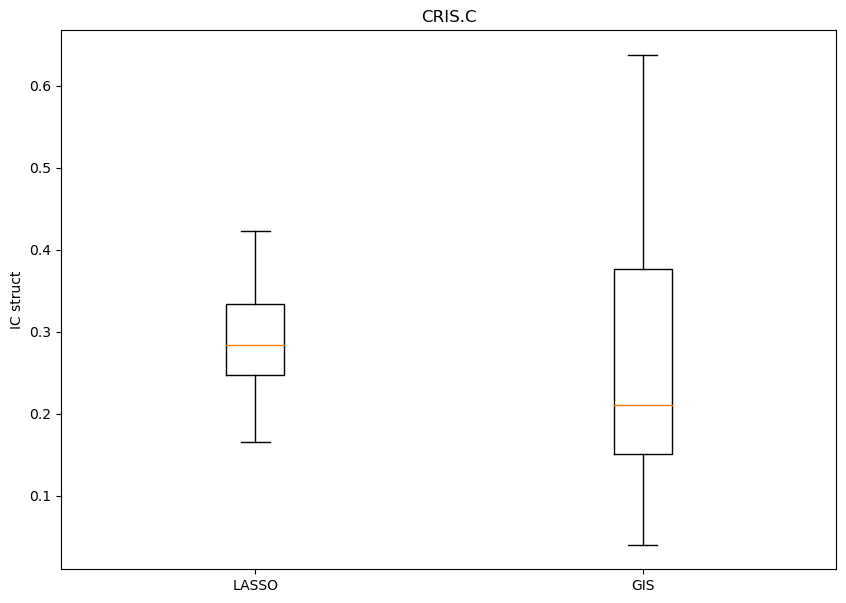


--------------------- CRIS.D ---------------------

T-test Proportions
----GO----
nan
----KEGG----
nan
----Reactome----
nan
----HPO----
0.864
----GO----
1.111
----KEGG----
1.148
----Reactome----
1.248
----HPO----
1.210

--------------------- CRIS.E ---------------------

T-test Proportions
----GO----
nan
----KEGG----
nan
----Reactome----
nan
----HPO----
0.757
----GO----
1.181
----KEGG----
1.356
----Reactome----
1.144
----HPO----
1.145

--------------------- all ---------------------

T-test Proportions
----GO----
0.000
----KEGG----
0.535
----Reactome----
nan
----HPO----
nan
----GO----
1.150
----KEGG----
1.133
----Reactome----
1.183
----HPO----
1.237
--------Statistics--------
File 1
Min: 0.0911194194631036 Max: 0.4418899363121722 Mean: 0.2384246981618369 std: 0.03312544465684487
File 2
Min: 0.044889577143944 Max: 0.4418899363121722 Mean: 0.16827701496053205 std: 0.013815925789657898


/home/mongardi/anaconda3/envs/myenv/lib/python3.9/site-packages/statsmodels/stats/weightstats.py:792: RuntimeWarning: invalid value encountered in scalar divide
  zstat = value / std


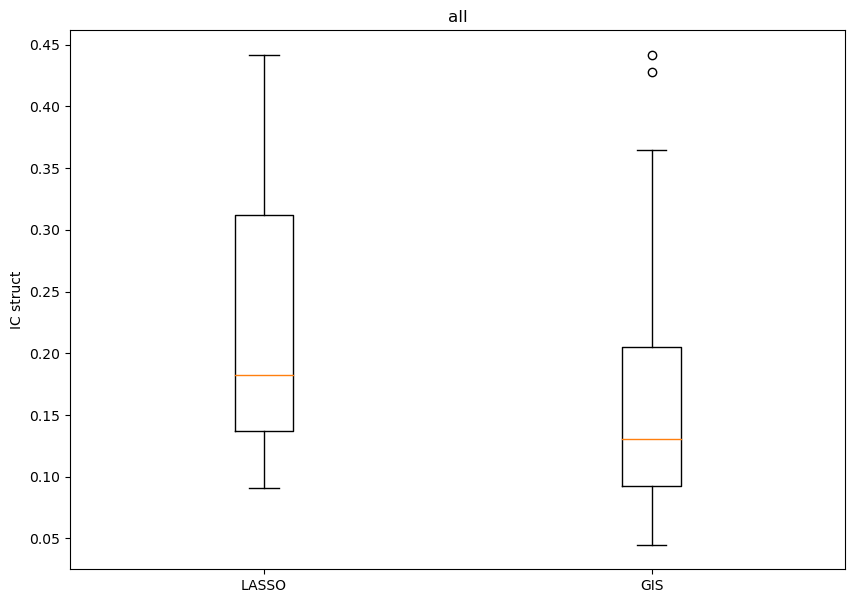

In [13]:
get_info_enriched_terms(results_dire_1, results_dire_2)

371
369
420
420
--------------- 0 --------------------
67
0.22834140544230003
72
ABCC2      0.008685
ASXL1      0.093015
CA9        0.015609
CEACAM3    0.108729
DPEP1      0.002072
FAS        0.099723
HID1       0.026926
MED11      0.085839
SLC3A2     0.048026
Name: 0, dtype: float64
Shared genes:  63
0.03857607588012531
0.020668644462997893


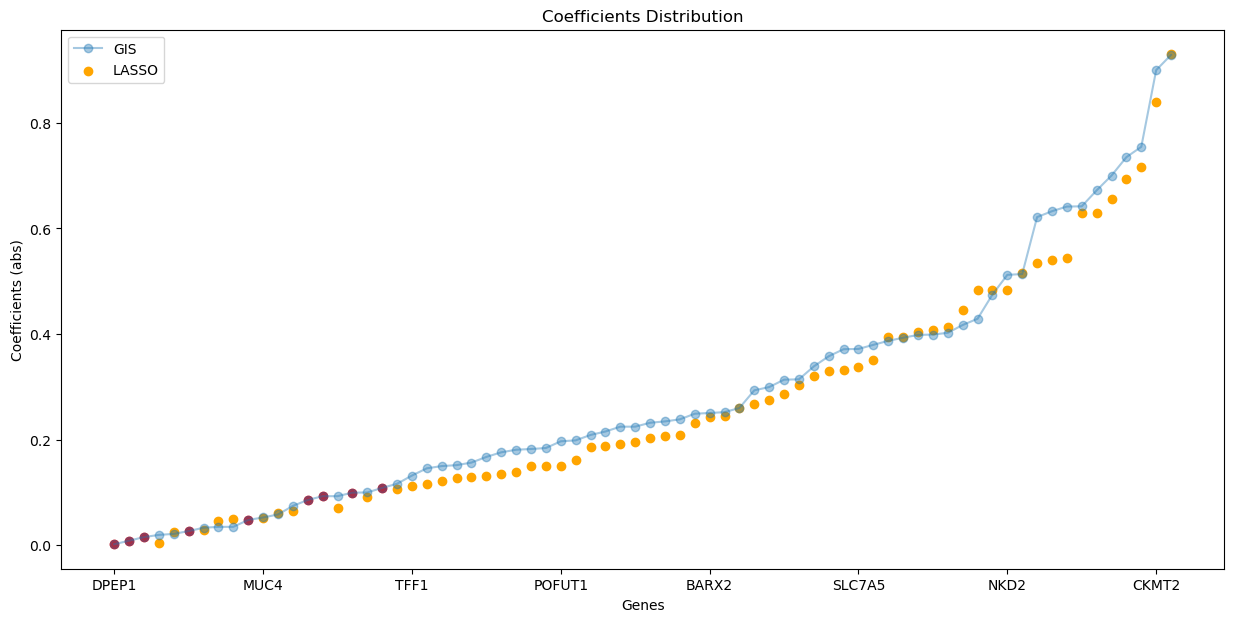

--------------- 1 --------------------
81
0.14922410903114997
94
BBC3        0.137940
BUB1B       0.040277
CD200       0.027795
CENPF       0.034396
CEP152      0.085120
CMPK2       0.043972
CRELD1      0.028280
DDX11       0.051414
DUSP27      0.007153
FANCI       0.071098
GLB1        0.056339
HSPA4       0.030404
IHH         0.089303
KNSTRN      0.033965
KRT6B       0.071468
LIPT2       0.096008
MAP3K1      0.000568
NDNF        0.080108
OTX1        0.057499
SLC26A11    0.025640
SLC2A1      0.086836
TAP2        0.016725
THRB        0.079188
TRPS1       0.088549
TUBB3       0.085725
TUBGCP3     0.067882
Name: 1, dtype: float64
Shared genes:  68
0.018323478585562294
0.02697026056797566


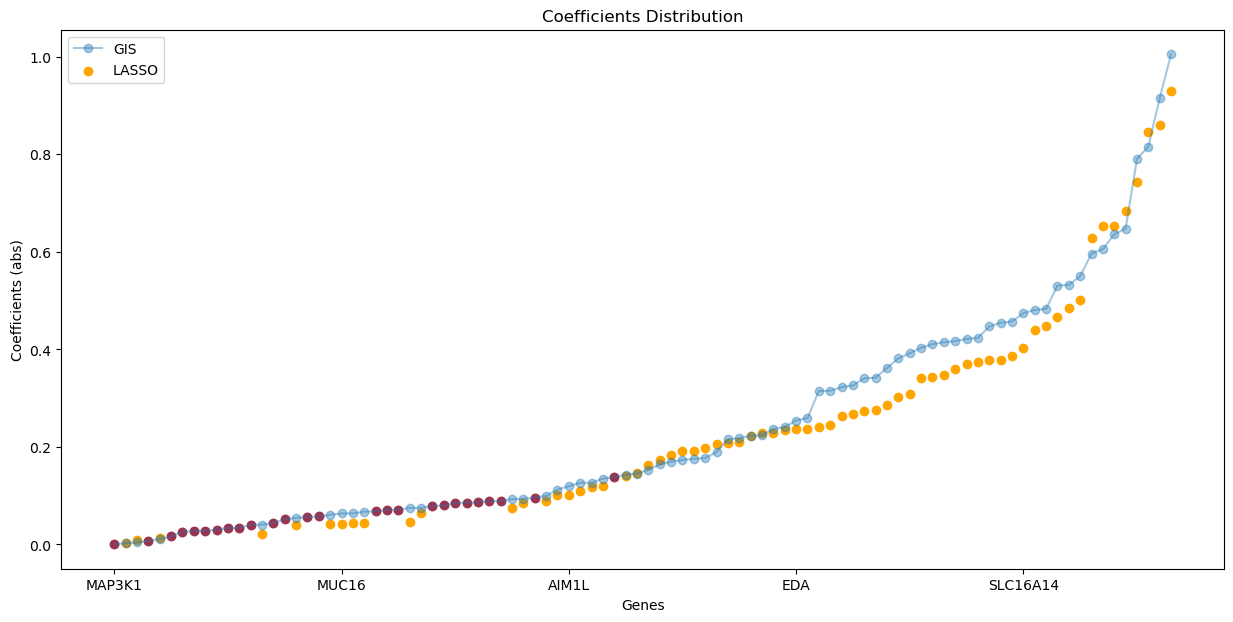

--------------- 2 --------------------
74
0.1775014215035283
81
ARHGAP44    0.099524
ARHGEF28    0.006135
BMPER       0.040527
CACNG4      0.036321
COMMD9      0.037575
GSS         0.054181
HMGCS2      0.022558
KCNH4       0.017554
MED30       0.124272
MYRF        0.015697
PID1        0.053780
PIGU        0.094351
SHOX        0.142502
SLC13A3     0.000786
SLC26A2     0.124520
VAV3        0.015647
ZNF549      0.034640
Name: 2, dtype: float64
Shared genes:  64
0.003144145406036017
0.0004465252223730206


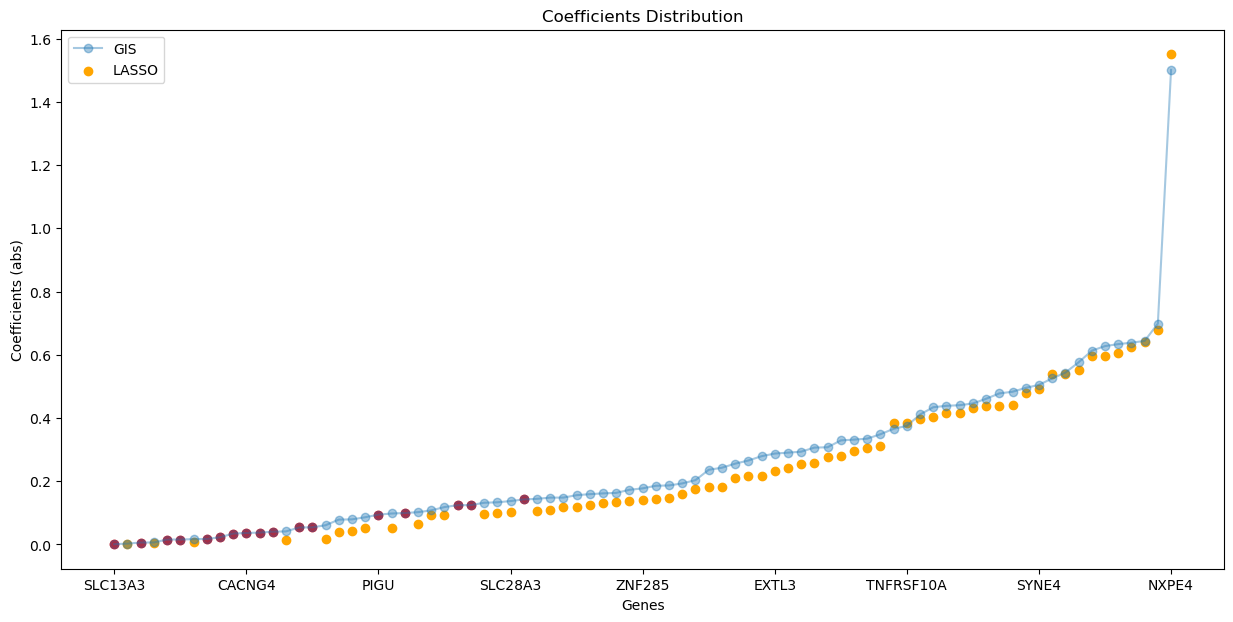

--------------- 3 --------------------
92
0.1741186901597035
104
ANGPT2     0.004675
CA1        0.030515
CASP10     0.156782
COCH       0.029895
EGR1       0.049975
FFAR4      0.065007
FN1        0.000474
FRMPD3     0.088338
GLDC       0.036182
GNE        0.050231
IRX5       0.009179
KCNJ11     0.013543
MPC1       0.049541
NES        0.003710
NNT        0.045167
SLC40A1    0.051089
STK33      0.000021
TTBK1      0.107627
Name: 3, dtype: float64
Shared genes:  86
0.0012613451152233507
0.0007074730726481689


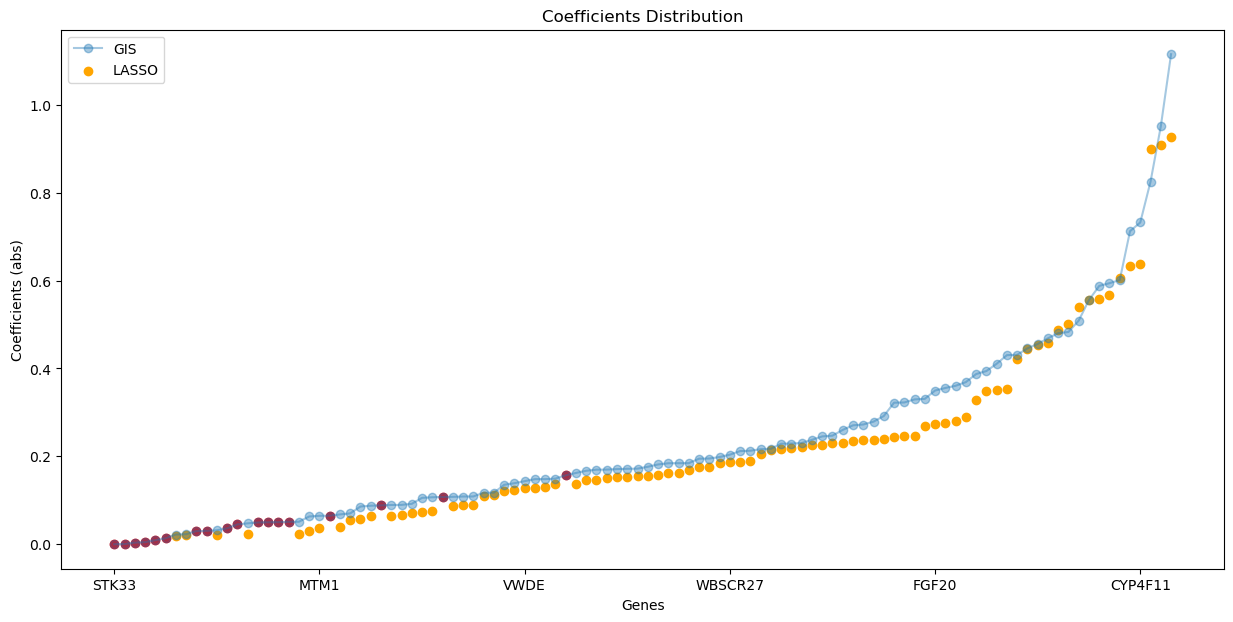

--------------- 4 --------------------
86
0.1811373448028555
96
ALDH4A1     0.103769
BMP7        0.033282
CLCN4       0.070111
DNAH5       0.035255
EPHB1       0.009172
GABRR1      0.053458
GPKOW       0.020714
GRK1        0.027644
KRTAP5-8    0.062396
NT5DC4      0.056516
PCSK9       0.022046
PLCE1       0.062643
RPS6KA6     0.112250
VPS16       0.092323
YARS2       0.098017
ZNF177      0.011695
Name: 4, dtype: float64
Shared genes:  80
0.00012885774936313263
3.9494330554378586e-05


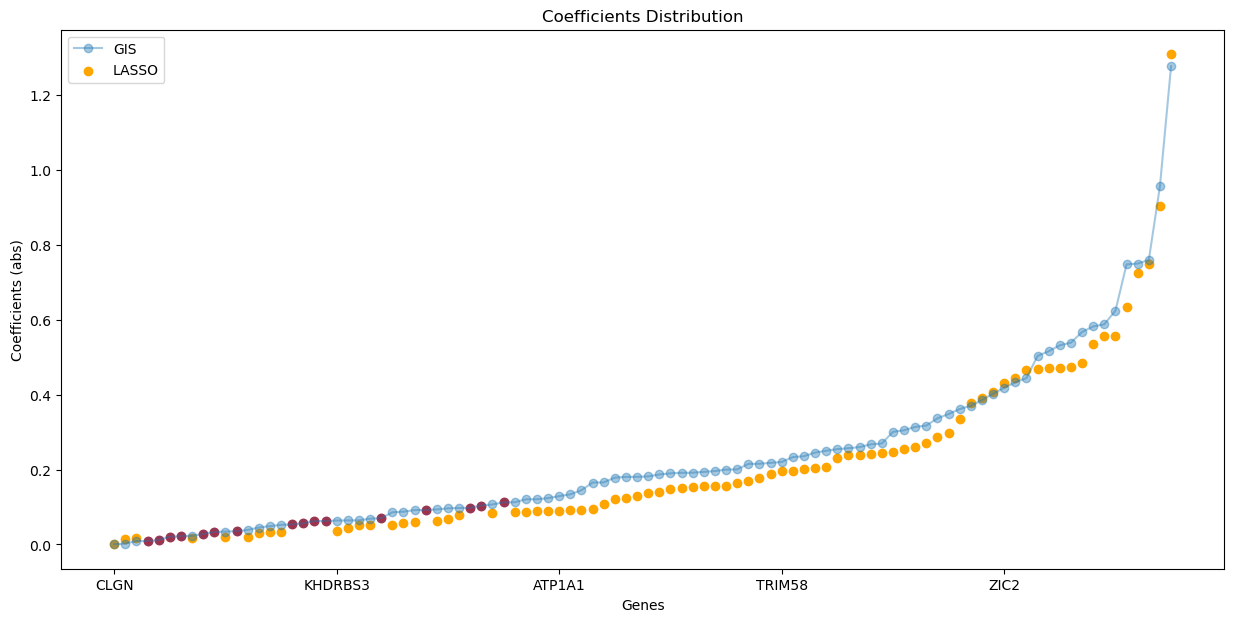

In [14]:
all_genes_new, all_genes_lasso = get_info_coefficients(results_dire_1, results_dire_2, X, 10,  5)

# Not Overlapping Genes

## KEGG

In [15]:
matching_ids = get_kegg_pathways_matrix.get_matching_ids(all_genes_lasso, matching_set)
matching_ids_cancer =  get_kegg_pathways_matrix.get_matching_ids(all_genes_lasso, matching_set_cancer)

The total number of genes with KEGG annotations in the dataset: 38
Number of matches:  0
Percentages of matching genes:  0.0
The total number of genes with KEGG annotations in the dataset: 38
Number of matches:  0
Percentages of matching genes:  0.0


In [16]:
matching_ids = get_kegg_pathways_matrix.get_matching_ids(all_genes_new, matching_set)
matching_ids_cancer =  get_kegg_pathways_matrix.get_matching_ids(all_genes_new, matching_set_cancer)

The total number of genes with KEGG annotations in the dataset: 86
Number of matches:  1
Percentages of matching genes:  0.011627906976744186
The total number of genes with KEGG annotations in the dataset: 86
Number of matches:  9
Percentages of matching genes:  0.10465116279069768


In [17]:
print(len(all_genes_new))
print(len(all_genes_lasso))

86
38


In [18]:
print(os.path.join(dire_CRC_results,'all_genes_gis_go_reactome_hpo.txt'))

/home/mongardi/GIS_prior_knowledge/results/CRC/all_genes_gis_go_reactome_hpo.txt


In [19]:
save_list(all_genes_new, os.path.join(dire_CRC_results,'all_genes_gis_go_reactome_hpo.txt'))
save_list(all_genes_lasso, os.path.join(dire_CRC_results,'all_genes_lasso.txt'))

## Malacards - Genes

In [20]:
# check overlap with malacards
genes_malacards_df = pd.read_csv(os.path.join(dire_prior, 'malacards_colorectal_coding.csv'))
genes_malacards_df = genes_malacards_df.set_index('Symbol')
genes_malacards = genes_malacards_df.index.tolist()

In [21]:
overlap_gis = np.intersect1d(genes_malacards, all_genes_new)
print(len(overlap_gis))

14


In [22]:
overlap_lasso = np.intersect1d(genes_malacards, all_genes_lasso)
print(len(overlap_lasso))

0


In [23]:
#overlap_gis_idx = np.where(np.isin(genes_malacards, overlap_gis))[0]
#overlap_lasso_idx = np.where(np.isin(genes_malacards, overlap_lasso))[0]

## Malacards - GO terms

In [24]:
go_terms_crc = pd.read_excel(os.path.join(dire_prior, 'GO_terms_disease.xlsx'), sheet_name='Colorectal')

In [25]:
go_terms_crc = go_terms_crc

In [26]:
go_terms_crc = go_terms_crc.set_index('GO ID')
go_terms_crc.head()

,#,Name,Score,Top Affiliating Genes
GO ID,,,,
GO:0030027,1,lamellipodium,9.65,PIK3CA MCC CTNNB1 APC AKT1
GO:0030877,2,beta-catenin destruction complex,9.10,CTNNB1 AXIN2 APC
GO:0016310,1,phosphorylation,10.30,AKT1 BRAF BUB1 BUB1B FGFR3 PIK3CA
GO:0043065,2,positive regulation of apoptotic process,10.29,TP53 FLCN CTNNB1 BAX APC
GO:0010629,3,negative regulation of gene expression,10.23,TP53 PIK3CA FLCN CTNNB1 AKT1


In [27]:
go_terms_crc_list = go_terms_crc.index.tolist()

In [28]:
files_dire1= os.listdir(results_dire_1)
files_dire1 = [x for x in files_dire1 if x.startswith('significant') and 'info' not in x]
files_dire1.sort()
print(files_dire1)
for i in range(len(files_dire1)):
    dict_dire1 = load_dictionary(os.path.join(results_dire_1, files_dire1[i])) 
    significant_terms = list(dict_dire1['GO'].keys())
    print(np.intersect1d(go_terms_crc_list, significant_terms))

['significant_terms_CRIS.A.txt.json', 'significant_terms_CRIS.B.txt.json', 'significant_terms_CRIS.C.txt.json', 'significant_terms_CRIS.D.txt.json', 'significant_terms_CRIS.E.txt.json', 'significant_terms_all.txt.json']
[]
[]
[]
[]
[]
[]


In [29]:
files_dire2 = os.listdir(results_dire_2)
files_dire2 = [x for x in files_dire2 if x.startswith('significant') and 'info' not in x]
files_dire2.sort()
print(files_dire2)
for i in range(len(files_dire2)):
    dict_dire2 = load_dictionary(os.path.join(results_dire_2, files_dire2[i])) 
    significant_terms = list(dict_dire2['GO'].keys())
    print(np.intersect1d(go_terms_crc_list, significant_terms))

['significant_terms_CRIS.A.txt.json', 'significant_terms_CRIS.B.txt.json', 'significant_terms_CRIS.C.txt.json', 'significant_terms_CRIS.D.txt.json', 'significant_terms_CRIS.E.txt.json', 'significant_terms_all.txt.json']
[]
[]
[]
[]
[]
[]
